## Modeling of Scores.csv Dataset

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [3]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

#### Load Data

In [4]:
df = pd.read_csv("/content/scores.csv")
df.head()

INSTIT_SCORE  BOTH_NAME_SCORE  FNAME_SCORE  FNAME_PARTIAL_SCORE  \
0         1.000                1         1.00                  1.0   
1         1.000                1         1.00                  1.0   
2         1.000                1         1.00                  1.0   
3         0.000                0         0.44                  0.5   
4         0.125                1         1.00                  1.0   

   LNAME_SCORE  LNAME_PARTIAL_SCORE  EMAIL_ADDR_SCORE  AUTH_KW_SCORE  \
0          1.0                  1.0               1.0            0.0   
1          1.0                  1.0               1.0            0.0   
2          1.0                  1.0               1.0            0.0   
3          1.0                  1.0               0.0            0.0   
4          1.0                  1.0               0.0            0.0   

   COAUTHOR_SCORE  MATCH  
0             0.0      1  
1             0.0      1  
2             0.0      1  
3             0.0      1  
4             0.0      1

In [30]:
stratkfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for t_, v_ in stratkfold.split(df, df.MATCH):
  df_train = df.iloc[t_]
  df_valid = df.iloc[v_]


#### EDA and Descriptive Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693446 entries, 0 to 693445
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INSTIT_SCORE         693446 non-null  float64
 1   BOTH_NAME_SCORE      693446 non-null  int64  
 2   FNAME_SCORE          693446 non-null  float64
 3   FNAME_PARTIAL_SCORE  693446 non-null  float64
 4   LNAME_SCORE          693446 non-null  float64
 5   LNAME_PARTIAL_SCORE  693446 non-null  float64
 6   EMAIL_ADDR_SCORE     693446 non-null  float64
 7   AUTH_KW_SCORE        693446 non-null  float64
 8   COAUTHOR_SCORE       693446 non-null  float64
 9   MATCH                693446 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 52.9 MB


In [7]:
df_train.describe()

INSTIT_SCORE  BOTH_NAME_SCORE    FNAME_SCORE  FNAME_PARTIAL_SCORE  \
count  624102.000000    624102.000000  624102.000000        624102.000000   
mean        0.019884         0.484336       0.591881             0.667708   
std         0.120025         0.499755       0.426969             0.423410   
min         0.000000         0.000000       0.000000             0.000000   
25%         0.000000         0.000000       0.170000             0.250000   
50%         0.000000         0.000000       0.670000             1.000000   
75%         0.000000         1.000000       1.000000             1.000000   
max         1.000000         1.000000       1.000000             1.000000   

         LNAME_SCORE  LNAME_PARTIAL_SCORE  EMAIL_ADDR_SCORE  AUTH_KW_SCORE  \
count  624102.000000        624102.000000     624102.000000  624102.000000   
mean        0.722307             0.734533          0.014110       0.003013   
std         0.377876             0.365671          0.117944       0.016711   
min         0.000000             0.000000          0.000000       0.000000   
25%         0.290000             0.330000          0.000000       0.000000   
50%         1.000000             1.000000          0.000000       0.000000   
75%         1.000000             1.000000          0.000000       0.000000   
max         1.000000             1.000000          1.000000       0.538462   

       COAUTHOR_SCORE          MATCH  
count   624102.000000  624102.000000  
mean         0.006777       0.640203  
std          0.051030       0.479941  
min          0.000000       0.000000  
25%          0.000000       0.000000  
50%          0.000000       1.000000  
75%          0.000000       1.000000  
max          1.000000       1.000000

In [8]:
df[df.MATCH==1].describe()

INSTIT_SCORE  BOTH_NAME_SCORE    FNAME_SCORE  FNAME_PARTIAL_SCORE  \
count  443946.000000    443946.000000  443946.000000        443946.000000   
mean        0.029581         0.756322       0.862978             0.928689   
std         0.147711         0.429301       0.251559             0.174986   
min         0.000000         0.000000       0.250000             0.330000   
25%         0.000000         1.000000       1.000000             1.000000   
50%         0.000000         1.000000       1.000000             1.000000   
75%         0.000000         1.000000       1.000000             1.000000   
max         1.000000         1.000000       1.000000             1.000000   

       LNAME_SCORE  LNAME_PARTIAL_SCORE  EMAIL_ADDR_SCORE  AUTH_KW_SCORE  \
count     443946.0             443946.0     443946.000000  443946.000000   
mean           1.0                  1.0          0.022043       0.004544   
std            0.0                  0.0          0.146824       0.020489   
min            1.0                  1.0          0.000000       0.000000   
25%            1.0                  1.0          0.000000       0.000000   
50%            1.0                  1.0          0.000000       0.000000   
75%            1.0                  1.0          0.000000       0.000000   
max            1.0                  1.0          1.000000       0.538462   

       COAUTHOR_SCORE     MATCH  
count   443946.000000  443946.0  
mean         0.010596       1.0  
std          0.063598       0.0  
min          0.000000       1.0  
25%          0.000000       1.0  
50%          0.000000       1.0  
75%          0.000000       1.0  
max          1.000000       1.0

In [9]:
df[df.MATCH==0].describe()

INSTIT_SCORE  BOTH_NAME_SCORE    FNAME_SCORE  FNAME_PARTIAL_SCORE  \
count  249500.000000         249500.0  249500.000000        249500.000000   
mean        0.002588              0.0       0.108956             0.202536   
std         0.026070              0.0       0.173958             0.326259   
min         0.000000              0.0       0.000000             0.000000   
25%         0.000000              0.0       0.000000             0.000000   
50%         0.000000              0.0       0.000000             0.000000   
75%         0.000000              0.0       0.200000             0.330000   
max         1.000000              0.0       1.000000             1.000000   

         LNAME_SCORE  LNAME_PARTIAL_SCORE  EMAIL_ADDR_SCORE  AUTH_KW_SCORE  \
count  249500.000000        249500.000000          249500.0  249500.000000   
mean        0.228126             0.262115               0.0       0.000297   
std         0.124394             0.151945               0.0       0.004601   
min         0.000000             0.000000               0.0       0.000000   
25%         0.150000             0.170000               0.0       0.000000   
50%         0.220000             0.250000               0.0       0.000000   
75%         0.310000             0.330000               0.0       0.000000   
max         0.910000             1.000000               0.0       0.250000   

       COAUTHOR_SCORE     MATCH  
count   249500.000000  249500.0  
mean         0.000013       0.0  
std          0.001605       0.0  
min          0.000000       0.0  
25%          0.000000       0.0  
50%          0.000000       0.0  
75%          0.000000       0.0  
max          0.416667       0.0

In [10]:
# visualisations
# specifies the parameters of our graphs
fig = plt.figure(figsize=(20, 18), dpi=800)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

vis_cols = [col for col in df_train.select_dtypes(exclude='O').columns]

count = 1
for col in vis_cols:
    ax1 = fig.add_subplot(4, 3, count)
    sns.distplot(df_train[col])
    count = count + 1
# set the spacing between subplots
plt.show()

In [11]:
# visualisations
# specifies the parameters of our graphs
fig = plt.figure(figsize=(20, 18), dpi=800)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

vis_cols = [col for col in df_train.select_dtypes(exclude='O').columns]

count = 1
for col in vis_cols:
    ax1 = fig.add_subplot(4, 3, count)
    sns.boxplot(df_train[col])
    count = count + 1
# set the spacing between subplots
plt.show()

In [12]:
# visualisations
# specifies the parameters of our graphs
fig = plt.figure(figsize=(20, 18), dpi=800)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

vis_cols = [col for col in df_train.select_dtypes(exclude='O').columns]

count = 1
for col in vis_cols:
    ax1 = fig.add_subplot(4, 3, count)
    sns.violinplot(df_train[col])
    count = count + 1
# set the spacing between subplots
plt.show()

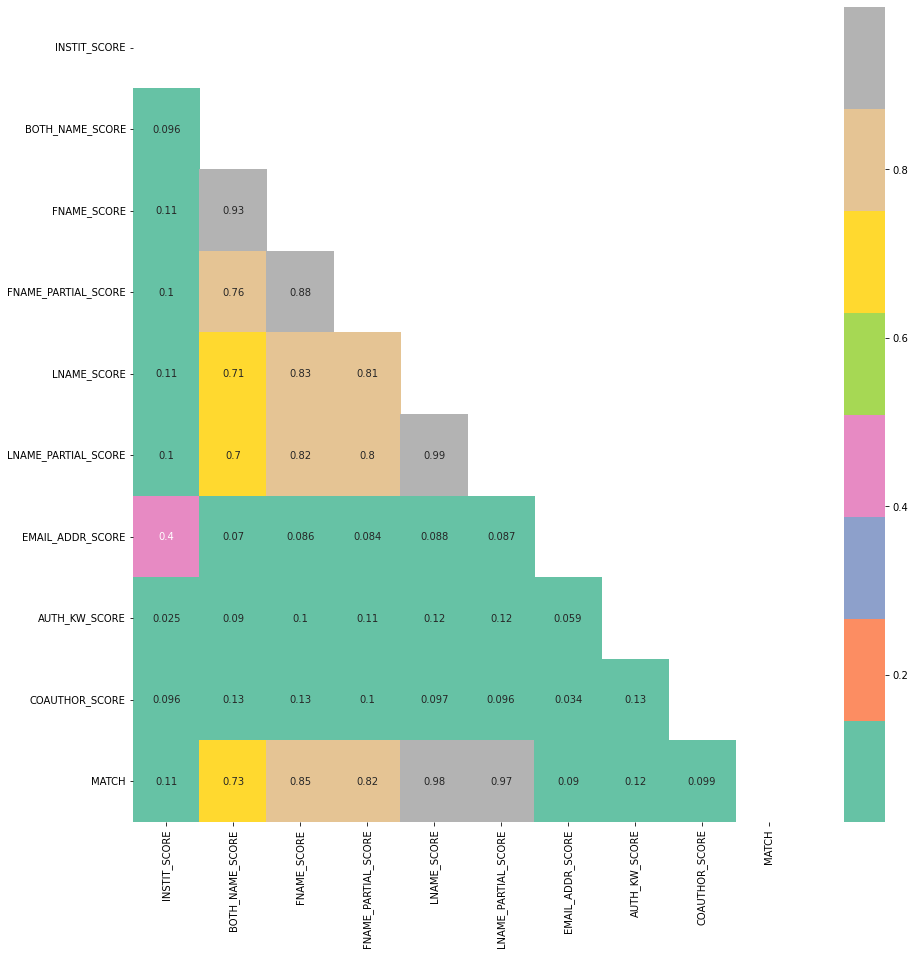

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), cmap='Set2', annot=True, mask=np.triu(df_train.corr()))
plt.show()

In [15]:
#  combo_list = []
#  combo_list.append(('INSTIT_SCORE', 'EMAIL_ADDR_SCORE'))
#  combo_list.append(('COAUTHOR_SCORE', 'AUTH_KW_SCORE'))
#  combo_list.append(('INSTIT_SCORE', 'COAUTHOR_SCORE'))
#  combo_list.append(('INSTIT_SCORE', 'AUTH_KW_SCORE'))
      
  # visualisations
  # specifies the parameters of our graphs
#  fig = plt.figure(figsize=(8, 8), dpi=800)
#  alpha = alpha_scatterplot = 0.2
#  alpha_bar_chart = 0.55

#  count = 1
#  for col1, col2 in combo_list:
#      ax1 = fig.add_subplot(2, 2, count)
#      sns.scatterplot(x=df_train[col1], y=df_train[col2], hue=df_train['MATCH'].astype(str))
#      plt.legend(loc='best')
#      count = count + 1
  # set the spacing between subplots
#  plt.show()

#### MODELING PART

In [21]:
X_train, y_train = df_train.drop(['MATCH'], axis=1), df_train.MATCH.values
X_valid, y_valid = df_valid.drop(['MATCH'], axis=1), df_valid.MATCH.values

In [23]:
logreg = linear_model.LogisticRegression(n_jobs=-1, verbose=1)
logreg.fit(X_train, y_train)
logreg.score(X_valid, y_valid)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.1s finished


0.999913474850023

In [26]:
ridge = linear_model.RidgeClassifier()
ridge.fit(X_train, y_train)
ridge.score(X_valid, y_valid)

0.9994952699584679

In [33]:
print(metrics.classification_report(y_valid, logreg.predict(X_valid)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24950
           1       1.00      1.00      1.00     44394

    accuracy                           1.00     69344
   macro avg       1.00      1.00      1.00     69344
weighted avg       1.00      1.00      1.00     69344

